# Project: Wrangle and Analyze Data (Medical Appointments No Shows)

## Table of Content
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Exploratory Data Analysis](#eda)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Taken from Kaggle, this dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment.

In this project, we will look for variables that could affect no-show rates.  We will be addressing questions such as: 

1. Whether certain neighborhoods have higher no-show rates
2. Whether certain age-group has a tendency to no-show
3. Whether Brazilian welfare plans have any impact on no-show rates
4. Whether SMS reminders affect no-show rates

<a id='wrangling'></a>
## Data Wrangling



### General Properties
First, we will import csv, then inspect object types, NA values, duplicates, uniques and general descriptive statistics of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [2]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe() #Worth pointing out that the min age is -1, which does not make much sense.  We need to clean this up later.  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

In [7]:
df.AppointmentID.nunique()

110527

### Data Cleaning - Header clean-up, datatype conversion

In the section above, we can see that AppointmentIDs are unique and it does not seem that it can provide us with much insight related to the no-show rate.  Hence we are dropping this column.

In [8]:
df.drop('AppointmentID', axis=1, inplace = True)

In [9]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In order to perform analysis on the dates, we would need to convert ScheduledDay and AppointmentDay from strings to datatime values.

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.dtypes

PatientId                float64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In order to keep the format consistent, we will replace any headers with a hyphen to an underscore

In [12]:
df.columns = df.columns.str.replace('-','_')

Converting the values under the No_show column, to 1s and 0s for consistency and for calcuations that need to be done in the next section. 

Creating a column for the new values, just in case we need to go back to the original No_show column

In [13]:
df['New_no_show'] = df['No_show'].copy()

In [14]:
df['New_no_show'].replace(('No','Yes'),(0,1), inplace=True)

In [15]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,New_no_show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Remove age with negative values

In [16]:
df = df[df['Age'] >= 0]

In [17]:
#Ensure negative values are removed
df[df['Age'] < 0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,New_no_show


<a id='eda'></a>
## Exploratory Data Analysis

Now that the dataset is clean, we will peform data analysis and look for variables that could affect the no-show rate of a patient.

### Research Question 1 - Whether certain neighborhoods have higher no-show rates

Due to the amount of neighborhoods in this dataset, we will only use the ones that have a good sample size for our analysis.  For simplicity reasons, we will use the median as the cut-off line; basically only includes neighbourhoods that have value_counts greater than the median.

In [18]:
df.Neighbourhood.value_counts().median() #median

851.0

No show rate is calculated by the sum of no-shows divide by the total entry per neighborhood.  We use lambda to exclusively include neighbourhoods with value_counts > 851 to this calcuation and drop everything else.  

In [19]:
no_show_rate = df.groupby('Neighbourhood').New_no_show.sum() / df.Neighbourhood.value_counts().loc[lambda n: n > 851]
no_show_rate.dropna(inplace=True) #dropna, those w value_counts less than and equal to 851

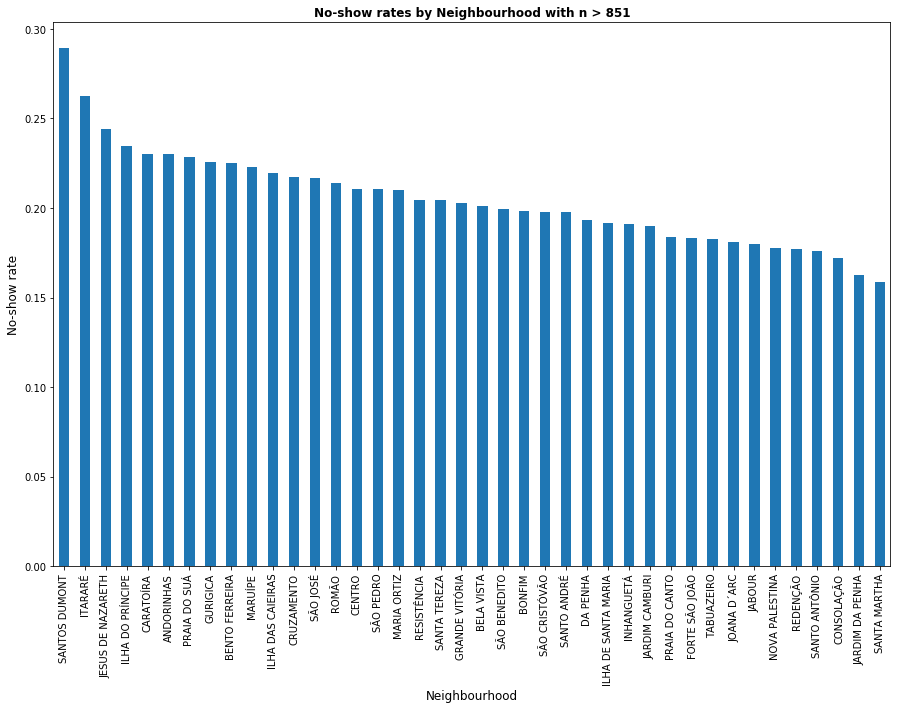

In [20]:
color= sb.color_palette()[0]
color2 = sb.color_palette()[1]

plt.figure(figsize=(15, 10)) #graph size
no_show_rate.sort_values(ascending=False).plot(kind='bar', color= color) #plotting bar graph

#Labels
plt.xlabel('Neighbourhood', fontsize='large')
plt.ylabel('No-show rate', fontsize='large')
plt.title('No-show rates by Neighbourhood with n > 851', fontweight='bold');

In [21]:
no_show_rate.sort_values(ascending=False).head()

SANTOS DUMONT        0.289185
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
ILHA DO PRÍNCIPE     0.234775
CARATOÍRA            0.230409
dtype: float64

This chart shows that certain neighborhoods such as Santos Dumont and Itarare have a higher no-show rate than others.  This may indicate that geographic location of the hospital could play a role in the no-show rate and should be looked into in future findings.

### Research Question 2 -  Whether certain age-group has a tendency to no-show

We can also further examine Santos Dumont and Itarare by plotting the age distribution of no-shows.

In [22]:
top_no_show_age = df[(df.Neighbourhood == 'SANTOS DUMONT') | (df.Neighbourhood == 'ITARARÉ')].query('New_no_show == 1').Age

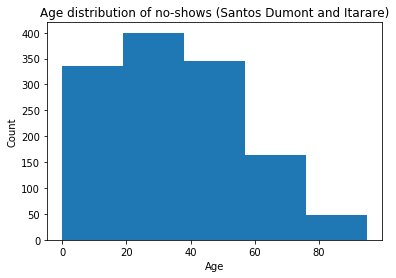

[ 0. 19. 38. 57. 76. 95.]


In [23]:
plt.figure(figsize=(6, 4))
plt.title('Age distribution of no-shows (Santos Dumont and Itarare)')
n,bins,patches = plt.hist(top_no_show_age, bins=5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print(bins) #Print out the bins

This chart indiciates that majority of patients who do not show up to their appointments are between 19-38 years of age in Santos Dumont and Itarare.

### Research Question 3 -  Whether Brazilian welfare plans have any impact on no-show rates

To answer this question, we would need to group the data by Scholarship (aka welfare enrollment).  0 indicates patients who are not enrolled in Bolsa Familia and 1 indicates patients who are enrolled in the welfare plan.

In [24]:
df.groupby('Scholarship')['New_no_show'].mean() #no_show rate by Scholarship

Scholarship
0    0.198074
1    0.237363
Name: New_no_show, dtype: float64

Pie-charts can easily show the portion size of patients who did not show up to their appointments.  

Two pie-charts were created for easy side by side comparions between patients who are not enrolled in Bolsa Familiar and those who are.  

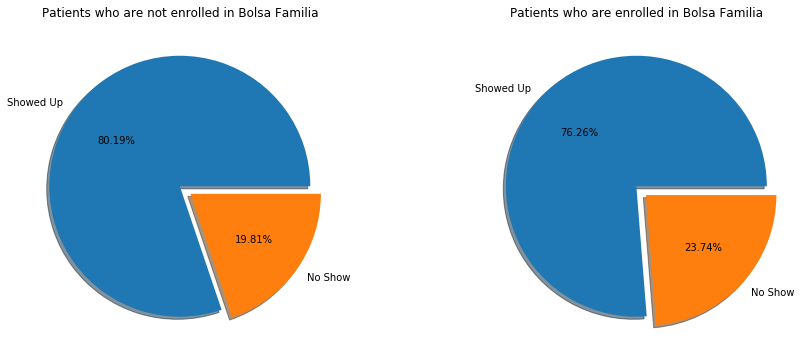

In [25]:
fig = plt.figure(figsize=(15,6)) #overall fig size

ax1 = fig.add_subplot(1,2,1) #indiciate this is the left pie-chart

pie = df.query('Scholarship == 0').New_no_show.value_counts() #values for the left pie-chart, those who are not enrolled
pie_labels = 'Showed Up','No Show' #labels
explode = (0, 0.1)  #special effect for impact
ax1.pie(pie, labels=pie_labels,explode=explode,shadow=True, autopct='%.2f%%')  #graph the left pie-chart + round to 2dps
ax1.set_title('Patients who are not enrolled in Bolsa Familia') #title

ax2 = fig.add_subplot(1,2,2)  #indiciate this is the right pie-chart
pie2 = df.query('Scholarship == 1').New_no_show.value_counts()  #values for those who are enrolled
pie_labels = 'Showed Up','No Show'
ax2.pie(pie2, labels=pie_labels,explode=explode,shadow=True, autopct='%.2f%%')
ax2.set_title('Patients who are enrolled in Bolsa Familia');


Alternatively, we can also just look at the no-show rate by welfare enrollment

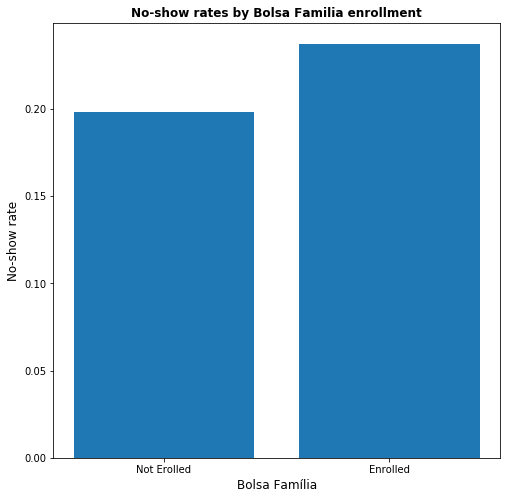

In [26]:
plt.figure(figsize=(8,8)) #graph size
x = df.groupby('Scholarship')['New_no_show'].mean().index #set x=index
y = df.groupby('Scholarship')['New_no_show'].mean() #set y
labels= ['Not Erolled', 'Enrolled'] #labels
plt.bar(x, y, tick_label = labels) #create graph

#labels
plt.xlabel('Bolsa Família', fontsize='large')
plt.ylabel('No-show rate', fontsize='large')
plt.title('No-show rates by Bolsa Familia enrollment', fontweight='bold');

Despite most patients do show up to their appointments (as seen in the pie-charts), those who are enrolled in Bolsa Familia have a higher no-show rate.  We could invesitigate the reasons behind that in future findings.

### Research Question 4 -  Whether SMS reminders affect no-show rates

In order to make our findings more insightful,  we will also incorporate the day of week to this analysis.  

First, we would need to find out the day of week of the actual appointment.  A new column named 'Scheduled_now has been created for this purpose (0 = Monday, 6 = Sunday).

In [27]:
df['Scheduled_dow'] = df.ScheduledDay.dt.dayofweek #convert to day of week

In [28]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,New_no_show,Scheduled_dow
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4


Using the groupby operation, we can dissect the no-show rate by the day of week and SMS reminders (0 = not sent, 1 = sent)

In [29]:
df.groupby(['Scheduled_dow', 'SMS_received']).mean() #no_show rate

PatientId        Age  Scholarship  \
Scheduled_dow SMS_received                                         
0             0             1.473244e+14  37.186349     0.096751   
              1             1.445449e+14  36.204628     0.103503   
1             0             1.500927e+14  36.918282     0.095667   
              1             1.440436e+14  37.768313     0.103531   
2             0             1.492692e+14  36.427841     0.101624   
              1             1.526763e+14  36.076913     0.105084   
3             0             1.485281e+14  37.423119     0.098756   
              1             1.401695e+14  37.472027     0.096707   
4             0             1.510606e+14  36.523506     0.097645   
              1             1.371322e+14  39.897842     0.084676   
5             0             2.038699e+14  38.550000     0.100000   
              1             9.816331e+12  39.000000     0.250000   

                            Hipertension  Diabetes  Alcoholism   Handcap  \
Scheduled_dow SMS_received                                                 
0             0                 0.198152  0.073264    0.033323  0.023368   
              1                 0.184498  0.063084    0.022508  0.016009   
1             0                 0.210775  0.080784    0.030644  0.027075   
              1                 0.191858  0.066089    0.023621  0.017213   
2             0                 0.188334  0.070174    0.034336  0.023151   
              1                 0.180949  0.057914    0.021751  0.014413   
3             0                 0.209952  0.078785    0.032072  0.025133   
              1                 0.198050  0.069054    0.023817  0.018862   
4             0                 0.185543  0.067800    0.038471  0.026223   
              1                 0.212920  0.076209    0.027588  0.016662   
5             0                 0.250000  0.150000    0.000000  0.000000   
              1                 0.000000  0.000000    0.000000  0.000000   

                            New_no_show  
Scheduled_dow SMS_received               
0             0                0.164411  
              1                0.285782  
1             0                0.165907  
              1                0.285212  
2             0                0.168491  
              1                0.272144  
3             0                0.168317  
              1                0.273497  
4             0                0.169413  
              1                0.262633  
5             0                0.050000  
              1                0.000000

'x1' shows the no-show rate for appointments without a SMS reminder broken down by day of week.  While, 'x2' shows the no-show rate for those with SMS messages.  

Note that we have to use reset_index in order to ensure both 'x1' and 'x2' share the same index number, which would be the x-axis in the bar chart below.

In [30]:
x1= df.groupby(['Scheduled_dow','SMS_received'], as_index=False).New_no_show.mean().query('SMS_received == 0').reset_index().New_no_show
x2 = df.groupby(['Scheduled_dow','SMS_received'], as_index=False).New_no_show.mean().query('SMS_received == 1').reset_index().New_no_show

Adding an extra value to the indices since we want to include Sunday to the chart as well. 

In [31]:
x1[6] = 0  #adding one extra value, which will be defined as Sunday in the following section
x2[6] = 0

Creating a bar chart for this multiple-variable expoloration with legend

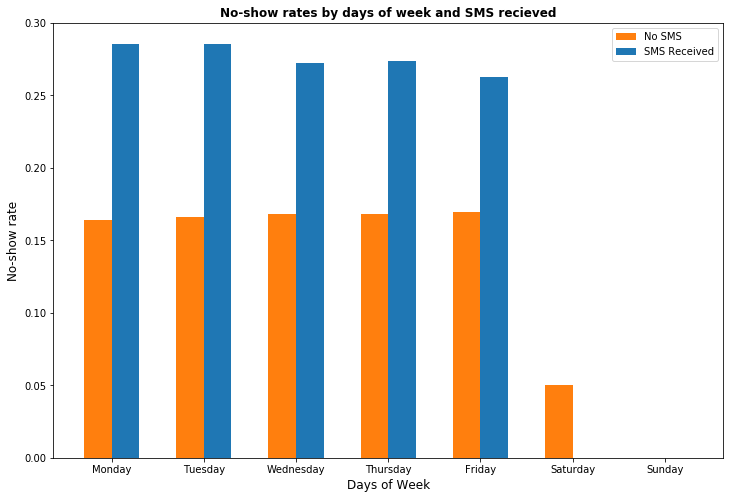

In [32]:
plt.figure(figsize=(12,8))  #graph size
q3_labels = 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' #labels that will replace the index num
width = 0.3 #width of bars
location = x1.index + width/2  #location of xlabels

x1_bars = plt.bar(x1.index, x1, width, color=color2, label='No SMS') #bar1 for No SMS
x2_bars = plt.bar(x2.index + width, x2, width, color = color, label='SMS Received') #bar2 for SMS Recieved

#Adding labels + playing with font styles
plt.xlabel('Days of Week', fontsize='large')
plt.ylabel('No-show rate', fontsize='large')
plt.title('No-show rates by days of week and SMS recieved', fontweight='bold')
plt.xticks(location, q3_labels)


#legend
plt.legend();

#### Quick look to see the sample size of Saturday (0 = Monday, 6 = Sunday)

In [33]:
df.groupby(['Scheduled_dow']).mean()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,New_no_show
Scheduled_dow,,,,,,,,,
0,1.465647e+14,36.918038,0.098596,0.194420,0.070482,0.030367,0.021357,0.273306,0.197583
1,1.482528e+14,37.176819,0.098059,0.205021,0.076315,0.028508,0.024075,0.304150,0.202194
2,1.503410e+14,36.317451,0.102712,0.186011,0.066318,0.030377,0.020402,0.314566,0.201096
3,1.456348e+14,37.440049,0.098047,0.205832,0.075416,0.029215,0.022962,0.346152,0.204725
4,1.456689e+14,37.829712,0.092625,0.196141,0.071055,0.034259,0.022522,0.387100,0.205498
5,1.715277e+14,38.625000,0.125000,0.208333,0.125000,0.000000,0.000000,0.166667,0.041667


In [34]:
df['Scheduled_dow'].value_counts()

1    26168
2    24262
0    23084
4    18915
3    18073
5       24
Name: Scheduled_dow, dtype: int64

Statistics shows that the day of the week does not have a signficiant impact on the no-show rate as the average is about 20%, with the exception of Saturday (4%).  But that could be due to its small sample size.  

SMS reminders are unlikely to decrease no-show rate as patients who received messages actually have a higher no show rate on average.  Further research would need to be done to see whether this phenommon is caused by other factors.  

<a id='conclusions'></a>
## Conclusions

With basic analysis, we are able to identify variables that may have an effect on the no-show rate.  Certain neighborhoods, Bolsa Familiae enrollments, and SMS remainders all yield to higher no-show rates.  Patients who are between ages 19-38 also have a tendency to miss their appointments in high no-show areas such as Santos Dumont and Itarare.  In contrast, factors such as the day of the week have almost no impact on the no-show rate, with Saturday being the only exception.

It is worth mentioning that we should not draw any final conclusion based on just these findings alone.  Some limitations which we encountered during this project are:

- Oversimplified way of determining the appropriate sample size for our neighborhood analysis.  A better way would be using methods that incorporate margins of errors or z-score, both of which are outside the scope of this project.

- Lack of Saturday data

- Further examinations should be done on 'SMS_received' and 'Scholarship' to understand whether these variables are really independent of other factors. Methods such as regressions or correlation matrix could be used.  

- A larger dataset which extends for a few years would be needed for more in-depth analysis

Overall, this project does lay a good foundation for further research. However, advanced statistical analysis should be implemented in order to verify the results of our findings.  

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0